In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [84]:
SM500K12L_data = np.loadtxt('SM500K12L_Model.txt', delimiter=',', skiprows=1)
SM141K04TFS_data = np.loadtxt('SM141K04TFS_Mode.csv', delimiter=',', skiprows=1)
SM141K04TFS_data = np.delete(SM141K04TFS_data, 0, 1)
log5_data = np.loadtxt('sc_log6.csv', delimiter=',', skiprows=1)
#log5_data = log5_data.transpose(log5_data)
time = np.linspace(5, len(log5_data)*5, len(log5_data))
log5_data = np.vstack((time, log5_data)).T
print(log5_data)

[[5.00000e+00 2.46590e-02]
 [1.00000e+01 2.41340e-02]
 [1.50000e+01 2.44680e-02]
 ...
 [3.63500e+04 1.91637e-01]
 [3.63550e+04 1.90872e-01]
 [3.63600e+04 1.91446e-01]]


[]

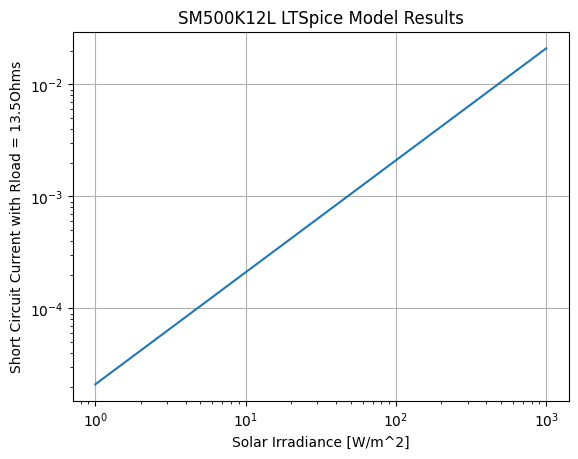

In [103]:
fig, ax = plt.subplots()
ax.plot(SM500K12L_data[:,0], SM500K12L_data[:,1])
ax.set_xlabel('Solar Irradiance [W/m^2]')
ax.set_ylabel('Short Circuit Current with Rload = 13.5Ohms')
ax.set_title('SM500K12L LTSpice Model Results')
ax.grid()
ax.loglog()

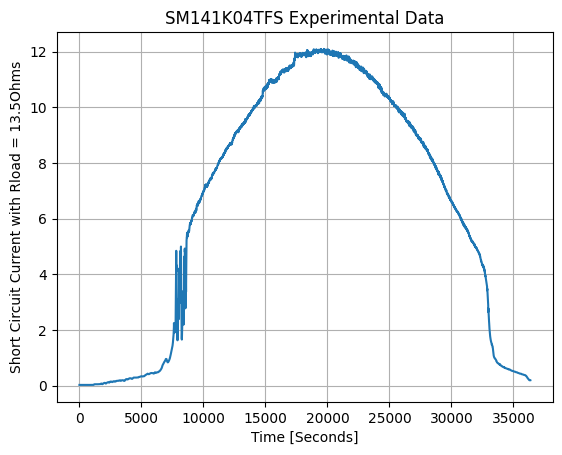

In [101]:
fig, ax = plt.subplots()
ax.plot(log5_data[:,0], log5_data[:,1])
ax.set_xlabel('Time [Seconds]')
ax.set_ylabel('Short Circuit Current with Rload = 13.5Ohms')
ax.set_title('SM141K04TFS Experimental Data')
ax.grid()

In [87]:
f1 = interp1d(SM500K12L_data[:,1], SM500K12L_data[:,0], kind='linear')
irradiance_interp = f1(log5_data[:,1]/1000)
print(log5_data[:,1])

[0.024659 0.024134 0.024468 ... 0.191637 0.190872 0.191446]


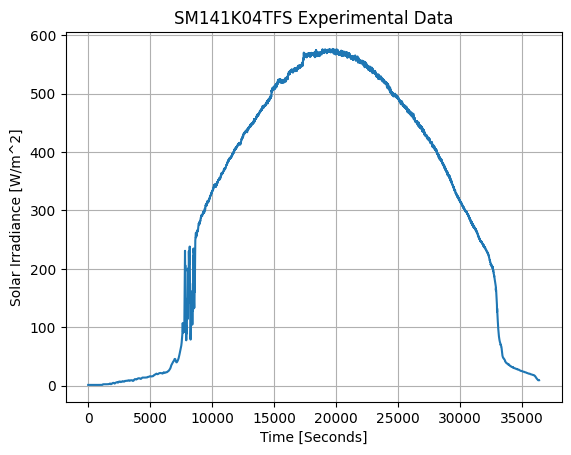

In [88]:
fig, ax = plt.subplots()
ax.plot(log5_data[:,0], irradiance_interp)
ax.set_xlabel('Time [Seconds]')
ax.set_ylabel('Solar Irradiance [W/m^2]')
ax.set_title('SM141K04TFS Experimental Data')
ax.grid()

[]

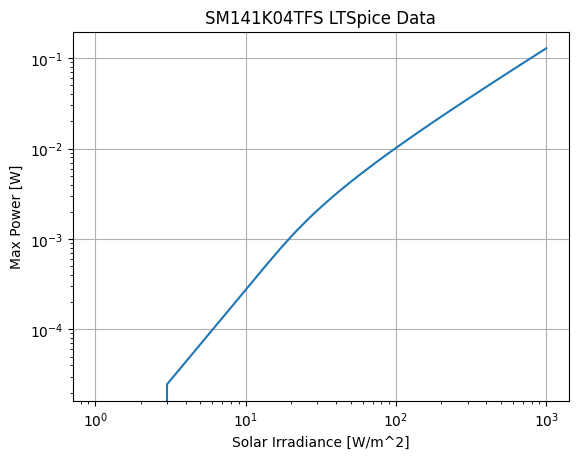

In [104]:
fig, ax = plt.subplots()
ax.plot(SM141K04TFS_data[:,0], SM141K04TFS_data[:,1])
ax.set_ylabel('Max Power [W]')
ax.set_xlabel('Solar Irradiance [W/m^2]')
ax.set_title('SM141K04TFS LTSpice Data')
ax.grid()
ax.loglog()

In [90]:
f2 = interp1d(SM141K04TFS_data[:,0], SM141K04TFS_data[:,1], kind='linear')
power_interp = f2(irradiance_interp)

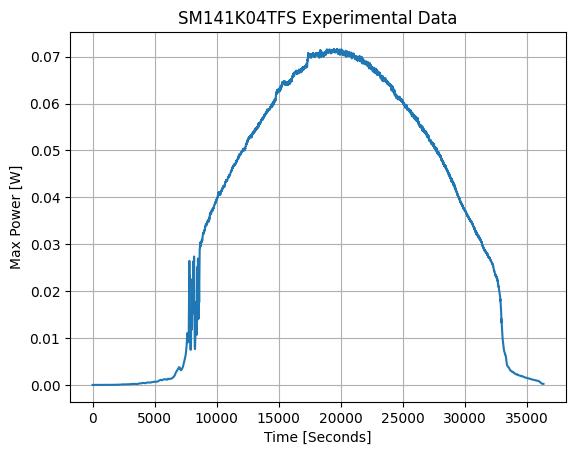

In [93]:
fig, ax = plt.subplots()
ax.plot(log5_data[:,0], power_interp)
ax.set_xlabel('Time [Seconds]')
ax.set_ylabel('Max Power [W]')
ax.set_title('SM141K04TFS Experimental Data')
ax.grid()

In [94]:
Etot = np.trapezoid(power_interp, log5_data[:,0])
print(Etot*7)
#print(Etot*7/6660*100)

9457.774425448675


In [105]:
1e-3*45000*7

315.0